In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_excel('/home/venkata/Desktop/Study/FlightFarePredictionData/Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#This gives details of all the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#This will give no. of rows in each column have null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#As the missing data is less, we can remove the rows having null values
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [9]:
#In the Additional_Info the majority of the rows have No info, so its better to remove the column as the column has more than 75% data is not there
#Route Column and Total_Stops columns are giving the same information. So its better to remove the Route column
df.drop(['Route','Additional_Info'],axis = 1, inplace = True)

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


# Exploratory Data Analysis

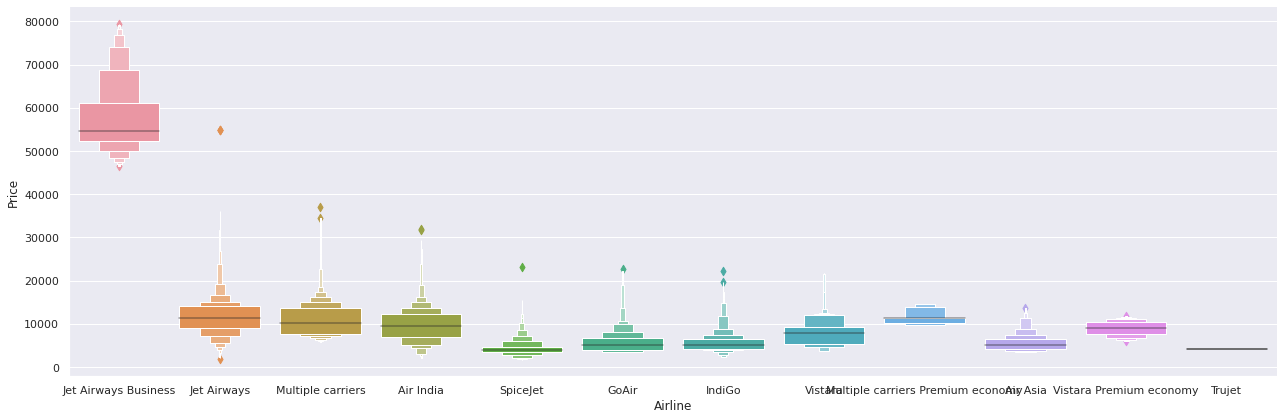

In [11]:
#EDA w.r.to Price and Airlines
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending = False),kind='boxen',height = 6, aspect = 3)

1. <b>Itseems Jet Airways and Jet Airways Business are the costliest flight among all others
2. Jet Airways Prices are very dynamic which varies from 1000 INR to 55000 INR
3. TrueJet is the cheapest Airways of all
4. Indigo,SpiceJet and GoAir seems like most economical airlines</b>

In [12]:
#We have two names with Delhi and New Delhi. Replacing New Delhi with Delhi
df['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

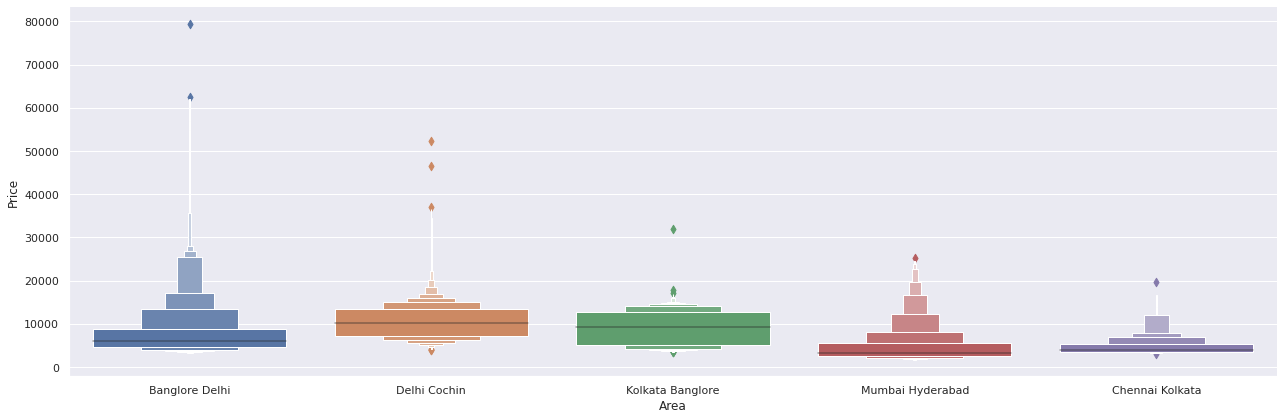

In [13]:
#EDA w.r to Price and Source, Destination
df['Area'] = df['Source']+' '+df['Destination']
sns.catplot(y='Price',x='Area',data = df.sort_values('Price',ascending = False),kind='boxen',height=6,aspect=3)

1. <b>Bangalore and New Delhi is the most costliest route of all others
2. Chennai and Kolkata is the cheapest route of all others</b>

In [14]:
#Converting Date of Jourey in to Year, Month and Day
df['JourneyYear'] = pd.to_datetime(df['Date_of_Journey']).dt.year
df['JourneyMonth'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['JourneyDay'] = pd.to_datetime(df['Date_of_Journey']).dt.day

df.drop(['Date_of_Journey'],axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Area,JourneyYear,JourneyMonth,JourneyDay
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,Banglore Delhi,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,Kolkata Banglore,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,Delhi Cochin,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,Kolkata Banglore,2019,12,5
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,Banglore Delhi,2019,1,3


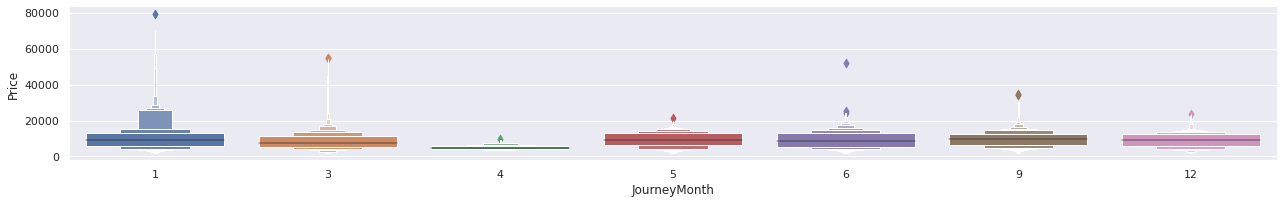

In [15]:
#EDS w.r.to Price and Journey Month
sns.catplot(y='Price',x='JourneyMonth',data=df.sort_values('Price',ascending=False),kind='boxen',height=3,aspect=6)

1. <b>January month has peak prices
2. May and December has moderate prices
3. April has lowest prices</b>

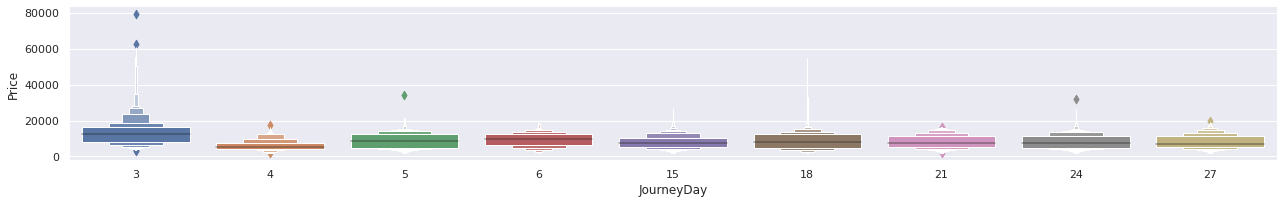

In [16]:
sns.catplot(y='Price',x='JourneyDay',data=df.sort_values('Price',ascending=False),kind='boxen',height=3,aspect=6)

<b>Month Starting has high fares</b>

In [17]:
#Converting Departure  and Arrival Times into Hours and Minutes
df['DepHour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['DepMinutes'] = pd.to_datetime(df['Dep_Time']).dt.minute

df['ArrHour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['ArrMinutes'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop(['Dep_Time','Arrival_Time'],axis = 1,inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Area,JourneyYear,JourneyMonth,JourneyDay,DepHour,DepMinutes,ArrHour,ArrMinutes
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,3897,Banglore Delhi,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,Kolkata Banglore,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,Delhi Cochin,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,Kolkata Banglore,2019,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,4h 45m,1 stop,13302,Banglore Delhi,2019,1,3,16,50,21,35


In [18]:
#Converting Total_Stops into integer values 
df['Total_Stops'].value_counts()
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Area,JourneyYear,JourneyMonth,JourneyDay,DepHour,DepMinutes,ArrHour,ArrMinutes
0,IndiGo,Banglore,Delhi,2h 50m,0,3897,Banglore Delhi,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,Kolkata Banglore,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,Delhi Cochin,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,Kolkata Banglore,2019,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,4h 45m,1,13302,Banglore Delhi,2019,1,3,16,50,21,35


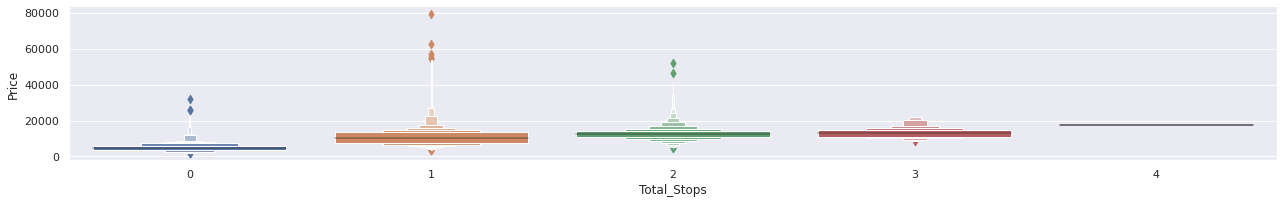

In [19]:
sns.catplot(y='Price',x='Total_Stops',data=df.sort_values('Price',ascending=False),kind='boxen',height=3,aspect=6)

<b>Rather than non-stop, single stop flights and two stop flights are the costliest flights.</b>

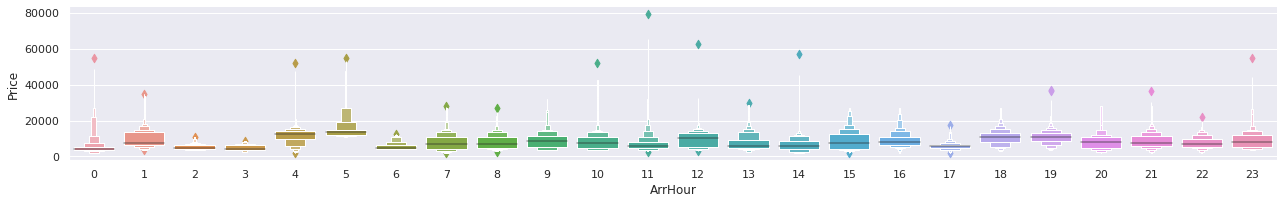

In [20]:
sns.catplot(y='Price',x='ArrHour',data=df.sort_values('ArrHour',ascending=False),kind='boxen',height=3,aspect=6)

<b>Morning 10 to 12 are the peak hours for travelling with high prices</b>

In [21]:
#Converting Duration in to hours and minutes
durHrs,durMins = [],[]
for col in df['Duration']:
    if ' ' in col.strip():
        hrs = col.strip().split()[0].replace('h','')
        mns = col.strip().split()[1].replace('m','')
    elif 'h' in col.strip():
        hrs = col.strip().replace('h','')
    elif 'm' in col.strip():
        mns = col.strip().replace('m','')
    
    durHrs.append(int(hrs))
    durMins.append(int(mns))
    
df['DurHour'],df['DurMin'] = durHrs,durMins
df.drop(['Duration'], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Area,JourneyYear,JourneyMonth,JourneyDay,DepHour,DepMinutes,ArrHour,ArrMinutes,DurHour,DurMin
0,IndiGo,Banglore,Delhi,0,3897,Banglore Delhi,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,Kolkata Banglore,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,Delhi Cochin,2019,9,6,9,25,4,25,19,25
3,IndiGo,Kolkata,Banglore,1,6218,Kolkata Banglore,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,Banglore Delhi,2019,1,3,16,50,21,35,4,45


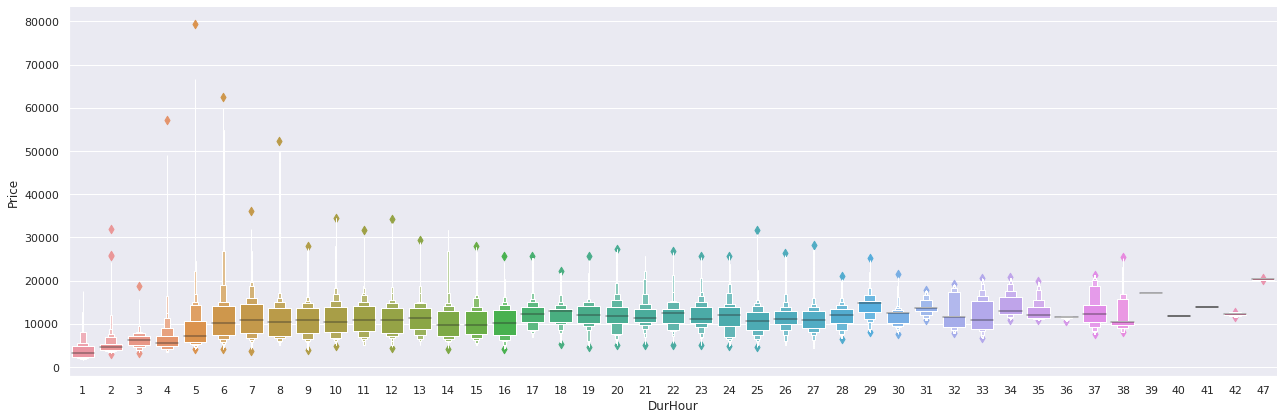

In [22]:
sns.catplot(y='Price',x='DurHour',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

<b>4 to 8 hour flights are the costliest Flights, Its clearly tells that duration is nowhere related to airline price.</b>

# Handling Categorical Data

In [23]:
#Converting Airline in to categorical data
airLine = df[['Airline']]
airLine = pd.get_dummies(airLine,drop_first=True)
airLine.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
#Converting Source in to categorical data
df['Source'].value_counts()
source = df[['Source']]
source = pd.get_dummies(source,drop_first = True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
#Converting Destination in to categorical data
df['Destination'].value_counts()
destination = df[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [26]:
#removing all the unnecessary columns
df.drop(['Source','Destination','Airline'],axis = 1, inplace = True)
df.head()

,Total_Stops,Price,Area,JourneyYear,JourneyMonth,JourneyDay,DepHour,DepMinutes,ArrHour,ArrMinutes,DurHour,DurMin
0,0,3897,Banglore Delhi,2019,3,24,22,20,1,10,2,50
1,2,7662,Kolkata Banglore,2019,1,5,5,50,13,15,7,25
2,2,13882,Delhi Cochin,2019,9,6,9,25,4,25,19,25
3,1,6218,Kolkata Banglore,2019,12,5,18,5,23,30,5,25
4,1,13302,Banglore Delhi,2019,1,3,16,50,21,35,4,45


In [27]:
#Concatenating all the postprocessed columns 
train_df = pd.concat([df,airLine,source,destination], axis = 1)
train_df.drop(['Area'],axis=1,inplace=True)
train_df.head()

,Total_Stops,Price,JourneyYear,JourneyMonth,JourneyDay,DepHour,DepMinutes,ArrHour,ArrMinutes,DurHour,DurMin,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,2019,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,2019,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,2019,9,6,9,25,4,25,19,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,2019,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,2019,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   JourneyYear                                10682 non-null  int64
 3   JourneyMonth                               10682 non-null  int64
 4   JourneyDay                                 10682 non-null  int64
 5   DepHour                                    10682 non-null  int64
 6   DepMinutes                                 10682 non-null  int64
 7   ArrHour                                    10682 non-null  int64
 8   ArrMinutes                                 10682 non-null  int64
 9   DurHour                                    10682 non-null  int64
 10  DurMin                                     106

In [29]:
train_y = train_df['Price']
train_df.drop(['Price'],axis=1,inplace=True)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   JourneyYear                                10682 non-null  int64
 2   JourneyMonth                               10682 non-null  int64
 3   JourneyDay                                 10682 non-null  int64
 4   DepHour                                    10682 non-null  int64
 5   DepMinutes                                 10682 non-null  int64
 6   ArrHour                                    10682 non-null  int64
 7   ArrMinutes                                 10682 non-null  int64
 8   DurHour                                    10682 non-null  int64
 9   DurMin                                     10682 non-null  int64
 10  Airline_Air India                          106

In [31]:
#Splitting the data in to training and testing
from sklearn.model_selection import train_test_split

#train_df.drop(['Trujet'],axis = 1,inplace=True)
X_train,X_test,y_train,y_test = train_test_split(train_df,train_y, random_state = 42)

In [32]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

8011 2671 8011 2671


# Model Selection

0.5866551599125407
0.5985961827469004


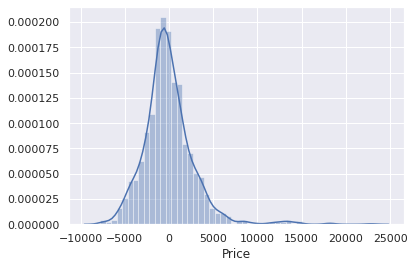

In [54]:
#Linear Regression Prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn import metrics

linReg = LinearRegression()
linReg.fit(X_train,y_train)
y_pred = linReg.predict(X_test)

print(metrics.r2_score(y_test, y_pred))
print(linReg.score(X_train,y_train))
linPred = linReg.predict(X_test)
sns.distplot(y_test-linPred)

0.9576718380436398
0.7980146301116011


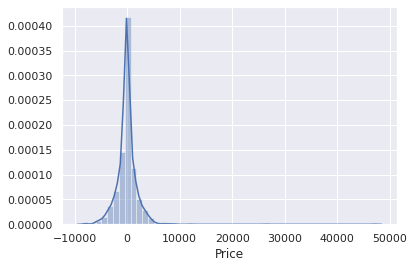

In [55]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor(random_state = 42,n_estimators=100)
rfReg.fit(X_train,y_train)

print(rfReg.score(X_train,y_train))

rfPred = rfReg.predict(X_test)
print(metrics.r2_score(y_test, rfPred))

sns.distplot(y_test-rfPred)

0.7823024641610317
0.7789447194905084


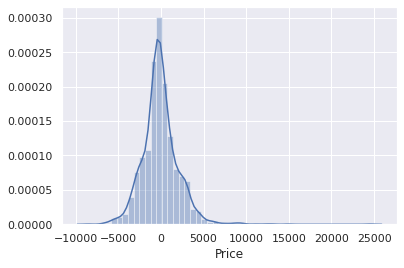

In [56]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gBoost = GradientBoostingRegressor()
gBoost.fit(X_train,y_train)

print(gBoost.score(X_train,y_train))

gBoostPred = gBoost.predict(X_test)
print(metrics.r2_score(y_test, gBoostPred))

sns.distplot(y_test-gBoostPred)

In [36]:
X_train.head()

,Total_Stops,JourneyYear,JourneyMonth,JourneyDay,DepHour,DepMinutes,ArrHour,ArrMinutes,DurHour,DurMin,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
752,1,2019,5,27,16,0,21,0,5,50,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7430,0,2019,6,3,15,10,17,45,2,35,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5478,1,2019,12,6,18,55,19,50,24,55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3445,1,2019,6,6,11,30,4,25,16,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9126,1,2019,9,5,20,55,4,25,7,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [37]:
y_train.head()

752      5054
7430     5618
5478    13044
3445    14714
9126    12373
Name: Price, dtype: int64

0.9386611229932427
0.8360743432698785


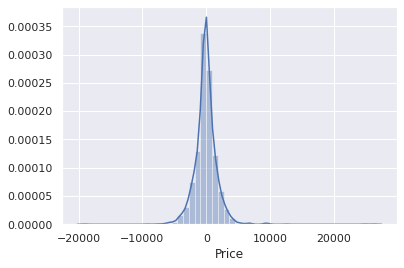

In [57]:
#BGBoost Regressor
from xgboost import XGBRegressor

xgBoost = XGBRegressor()
xgBoost.fit(X_train,y_train)
print(xgBoost.score(X_train,y_train))

xgPred = xgBoost.predict(X_test)
print(metrics.r2_score(y_test, xgPred))

sns.distplot(y_test-xgPred)

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 752 to 7270
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                8011 non-null   int64
 1   JourneyYear                                8011 non-null   int64
 2   JourneyMonth                               8011 non-null   int64
 3   JourneyDay                                 8011 non-null   int64
 4   DepHour                                    8011 non-null   int64
 5   DepMinutes                                 8011 non-null   int64
 6   ArrHour                                    8011 non-null   int64
 7   ArrMinutes                                 8011 non-null   int64
 8   DurHour                                    8011 non-null   int64
 9   DurMin                                     8011 non-null   int64
 10  Airline_Air India                          801

In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 6075 to 8535
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   JourneyYear                                2671 non-null   int64
 2   JourneyMonth                               2671 non-null   int64
 3   JourneyDay                                 2671 non-null   int64
 4   DepHour                                    2671 non-null   int64
 5   DepMinutes                                 2671 non-null   int64
 6   ArrHour                                    2671 non-null   int64
 7   ArrMinutes                                 2671 non-null   int64
 8   DurHour                                    2671 non-null   int64
 9   DurMin                                     2671 non-null   int64
 10  Airline_Air India                          26

In [39]:
#Saving the model
import pickle

file = open('FlightFarexgBoost.pkl','wb')
pickle.dump(xgBoost,file)

file = open('FlightFarerForest.pkl','wb')
pickle.dump(rfReg,file)

In [75]:
#Predicting random Data
fv = [2,2020,8,5,22,20,23,20,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0]
myPred = rfReg.predict([fv])
print(myPred)

dataa = pd.DataFrame([fv], columns=['Total_Stops', 'JourneyYear', 'JourneyMonth', 'JourneyDay', 'DepHour', 'DepMinutes', 'ArrHour', 'ArrMinutes', 'DurHour', 'DurMin', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'])
xgPred = xgBoost.predict(dataa)
print(xgPred)

linPred = linReg.predict([fv])
gBoostPred = gBoost.predict([fv])
print(linPred)
print(gBoostPred)

[4256.44]
[1256.3007]
[11791.99776883]
[6712.32740304]
